In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import cv2
warnings.filterwarnings('ignore')

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

In [10]:
#input layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [11]:
#hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))


In [12]:
#output layer 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
#for backpropagation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2551 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1114 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0791 - accuracy: 0.9748


In [15]:
#saving model
model.save('mnist.model')

In [16]:
loss , accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9736


In [17]:
print(loss)
print(accuracy)

0.09213212877511978
0.9735999703407288


1/1 [==============================] - 0s 25ms/step


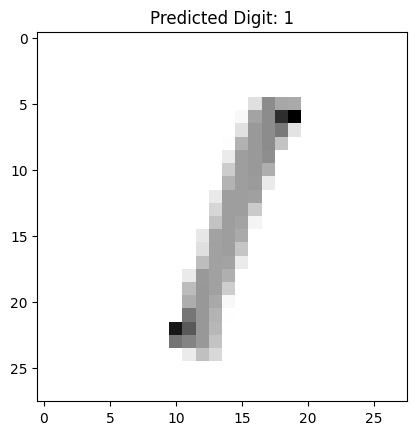

In [43]:
import os
# Select the first image from the test set
image = x_test[5]

# Invert the image colors if necessary (assuming the model expects inverted colors)
#image = np.invert(np.array(image))

# Reshape the image to match the model's input shape
image = image.reshape(1, 28, 28, 1)  # Add the channel dimension for grayscale

# Make a prediction
prediction = model.predict(image)
digit = np.argmax(prediction)

# Display the image
plt.imshow(image.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted Digit: {digit}')
plt.show()